# Load Time Series 

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
filename = './data/energy-spot-price.tsv'

## Load data

In [79]:
data = pd.read_csv(filename, delimiter="\t")
print(data.head())
print('\n Data Types:')
print(data.dtypes)

         Date  Price
0  01/10/2014  32.78
1  01/10/2014  32.51
2  01/10/2014  32.01
3  01/10/2014  31.58
4  01/10/2014  32.13

 Data Types:
Date      object
Price    float64
dtype: object


## Load data, parse date/time

In [80]:
dateparse = lambda dates: pd.datetime.strptime(dates, '%d/%m/%Y')
data = pd.read_csv(filename, parse_dates=['Date'], index_col='Date', date_parser=dateparse, delimiter="\t")

print(data.head())
print('\n Data Types:')
print(data.dtypes)

            Price
Date             
2014-10-01  32.78
2014-10-01  32.51
2014-10-01  32.01
2014-10-01  31.58
2014-10-01  32.13

 Data Types:
Price    float64
dtype: object


In [81]:
data.index

DatetimeIndex(['2014-10-01', '2014-10-01', '2014-10-01', '2014-10-01',
               '2014-10-01', '2014-10-01', '2014-10-01', '2014-10-01',
               '2014-10-01', '2014-10-01',
               ...
               '2016-10-01', '2016-10-01', '2016-10-01', '2016-10-01',
               '2016-10-01', '2016-10-01', '2016-10-01', '2016-10-01',
               '2016-10-01', '2016-10-01'],
              dtype='datetime64[ns]', name='Date', length=17568, freq=None)

# Subsetting by dates

In [82]:
ts = data['Price'] 
ts.head(10)

Date
2014-10-01    32.78
2014-10-01    32.51
2014-10-01    32.01
2014-10-01    31.58
2014-10-01    32.13
2014-10-01    33.16
2014-10-01    33.44
2014-10-01    34.38
2014-10-01    34.55
2014-10-01    34.39
Name: Price, dtype: float64

In [83]:
ts['2014-11-01'][0:10]

Date
2014-11-01    22.92
2014-11-01    19.67
2014-11-01    17.25
2014-11-01    15.34
2014-11-01    14.29
2014-11-01    13.52
2014-11-01    16.20
2014-11-01    17.61
2014-11-01    20.83
2014-11-01    23.47
Name: Price, dtype: float64

In [84]:
ts['2014-11-01' : '2014-11-02']

Date
2014-11-01    22.92
2014-11-01    19.67
2014-11-01    17.25
2014-11-01    15.34
2014-11-01    14.29
2014-11-01    13.52
2014-11-01    16.20
2014-11-01    17.61
2014-11-01    20.83
2014-11-01    23.47
2014-11-01    23.99
2014-11-01    23.63
2014-11-01    22.45
2014-11-01    20.87
2014-11-01    20.30
2014-11-01    19.88
2014-11-01    23.11
2014-11-01    24.06
2014-11-01    24.14
2014-11-01    23.85
2014-11-01    21.95
2014-11-01    19.33
2014-11-01    19.11
2014-11-01    17.32
2014-11-02    15.01
2014-11-02    14.32
2014-11-02    12.72
2014-11-02    10.52
2014-11-02    11.37
2014-11-02    11.60
2014-11-02    12.98
2014-11-02    13.55
2014-11-02    14.31
2014-11-02    14.99
2014-11-02    15.90
2014-11-02    16.71
2014-11-02    15.61
2014-11-02    14.98
2014-11-02    14.69
2014-11-02    15.42
2014-11-02    18.57
2014-11-02    19.42
2014-11-02    19.62
2014-11-02    19.14
2014-11-02    18.70
2014-11-02    15.94
2014-11-02    14.95
2014-11-02     9.96
Name: Price, dtype: float64

In [85]:
ts['2014-11']

Date
2014-11-01    22.92
2014-11-01    19.67
2014-11-01    17.25
2014-11-01    15.34
2014-11-01    14.29
2014-11-01    13.52
2014-11-01    16.20
2014-11-01    17.61
2014-11-01    20.83
2014-11-01    23.47
2014-11-01    23.99
2014-11-01    23.63
2014-11-01    22.45
2014-11-01    20.87
2014-11-01    20.30
2014-11-01    19.88
2014-11-01    23.11
2014-11-01    24.06
2014-11-01    24.14
2014-11-01    23.85
2014-11-01    21.95
2014-11-01    19.33
2014-11-01    19.11
2014-11-01    17.32
2014-11-02    15.01
2014-11-02    14.32
2014-11-02    12.72
2014-11-02    10.52
2014-11-02    11.37
2014-11-02    11.60
              ...  
2014-11-29    32.80
2014-11-29    32.42
2014-11-29    32.19
2014-11-29    31.92
2014-11-29    31.83
2014-11-29    31.41
2014-11-30    31.10
2014-11-30    30.52
2014-11-30    30.23
2014-11-30    30.15
2014-11-30    30.26
2014-11-30    30.41
2014-11-30    30.84
2014-11-30    31.14
2014-11-30    31.29
2014-11-30    31.87
2014-11-30    32.22
2014-11-30    32.23
2014-11-30    3

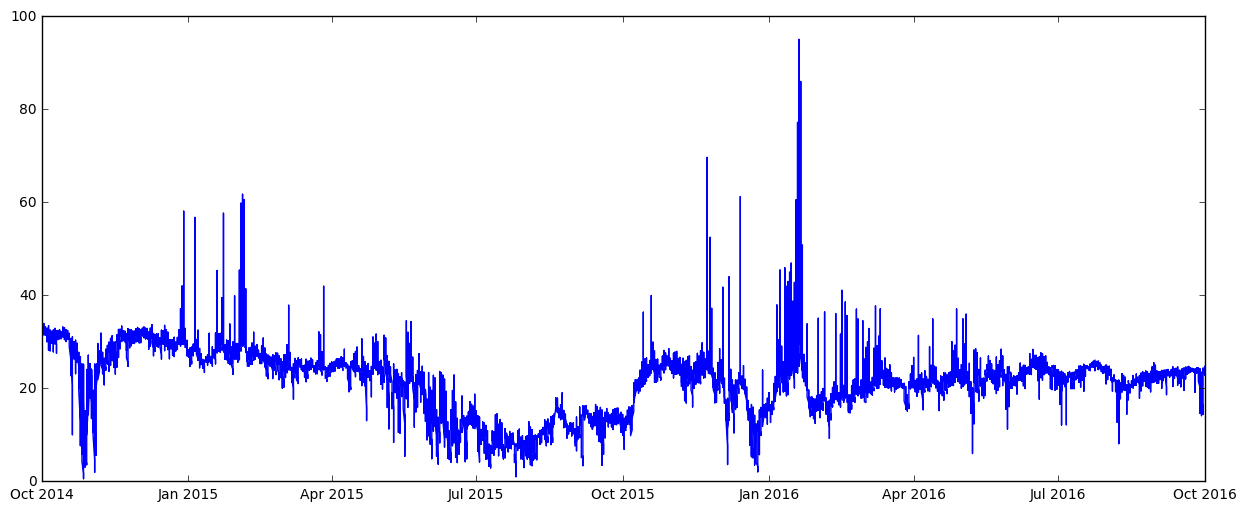

In [86]:
plt.plot(ts)

## Check Stationary or Non-Starionary

In [95]:
## From: https://www.analyticsvidhya.com/blog/2016/02/time-series-forecasting-codes-python/
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=60)
    rolstd = pd.rolling_std(timeseries, window=60)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).std()


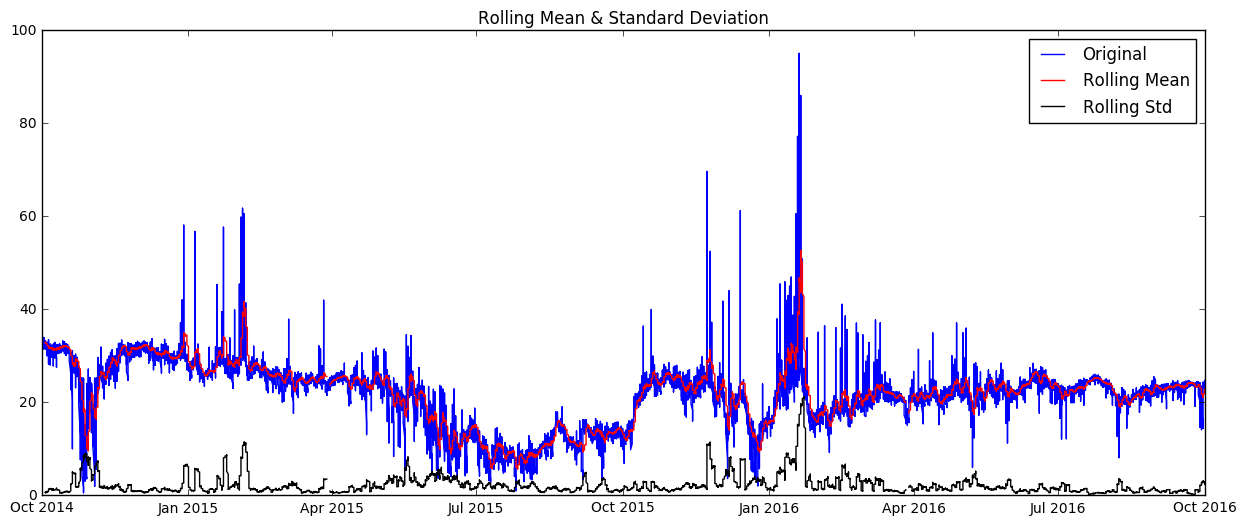

Results of Dickey-Fuller Test:


C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\numpy\linalg\linalg.py:1546: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)


LinAlgError: SVD did not converge

In [96]:
test_stationarity(ts)

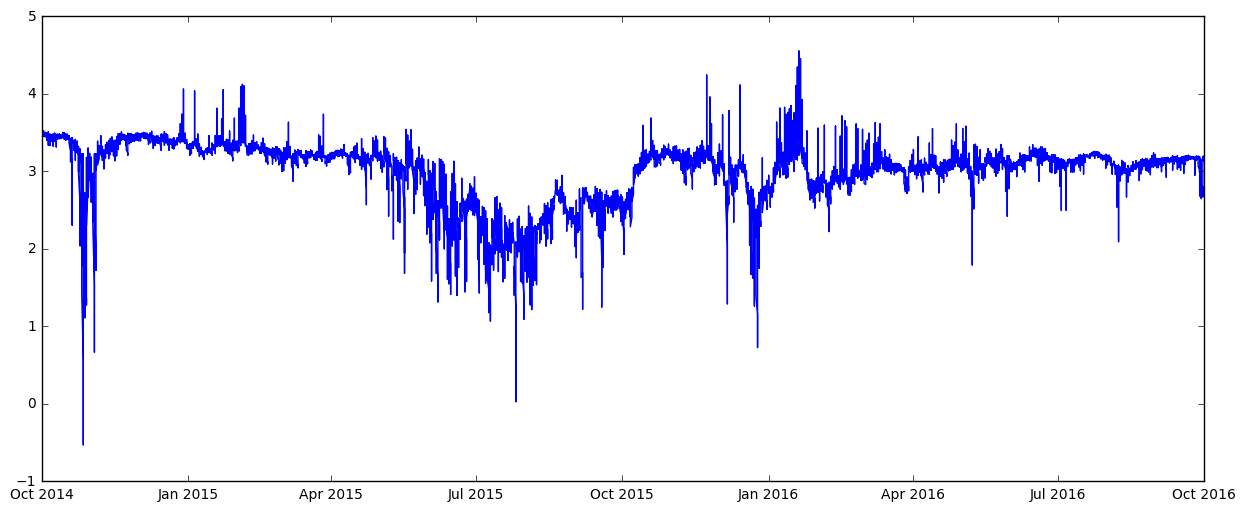

In [97]:
ts_log = np.log(ts)
plt.plot(ts_log)

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
  if __name__ == '__main__':


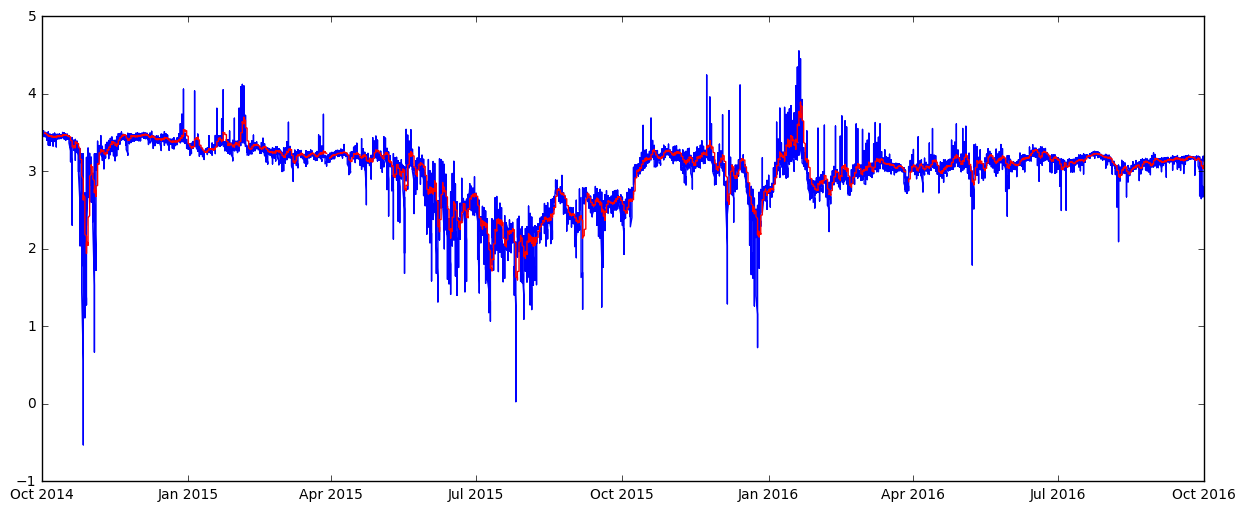

In [99]:
moving_avg = pd.rolling_mean(ts_log,60)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

In [101]:
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(12)

Date
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
2014-10-01   NaN
Name: Price, dtype: float64

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).std()


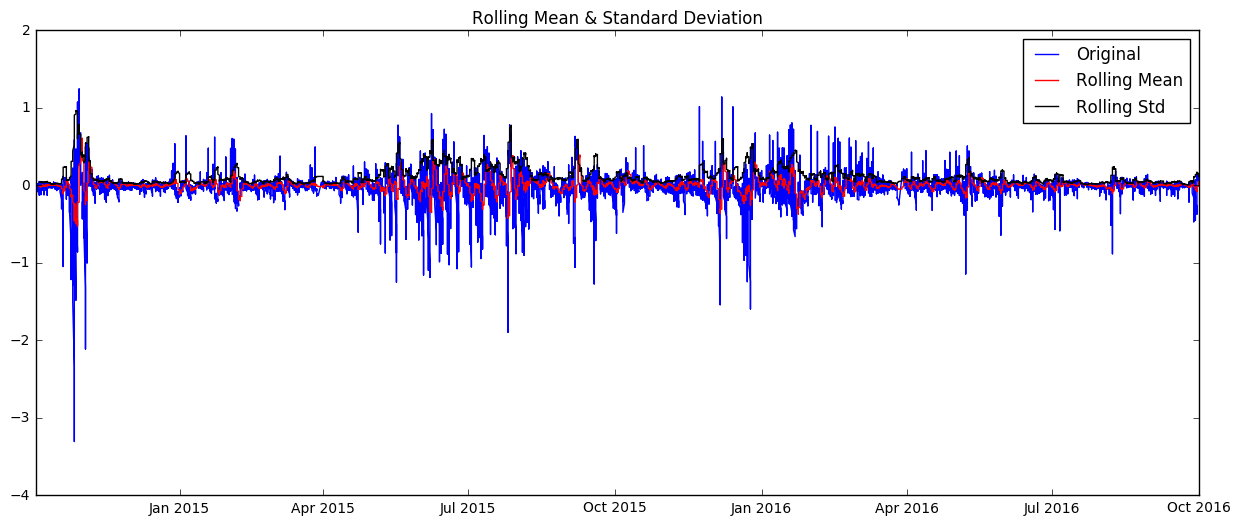

Results of Dickey-Fuller Test:
Test Statistic                   -19.098012
p-value                            0.000000
#Lags Used                        44.000000
Number of Observations Used    17344.000000
Critical Value (5%)               -2.861707
Critical Value (10%)              -2.566859
Critical Value (1%)               -3.430727
dtype: float64


In [102]:
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(adjust=True,halflife=12,ignore_na=False,min_periods=0).mean()
  if __name__ == '__main__':


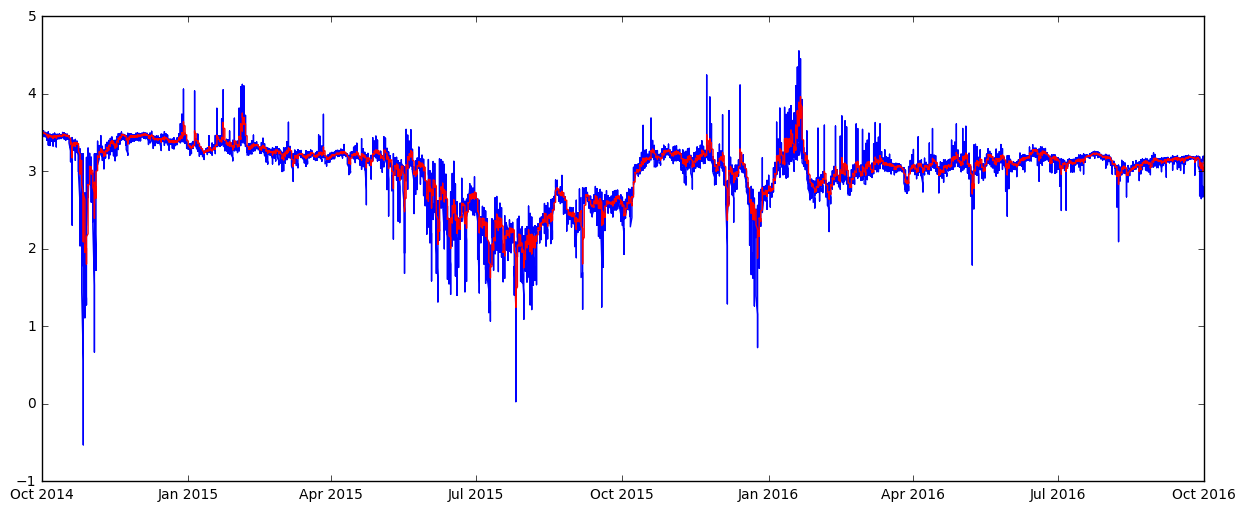

In [103]:
expwighted_avg = pd.ewma(ts_log, halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\ipykernel\__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).mean()
C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\ipykernel\__main__.py:7: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(center=False,window=60).std()


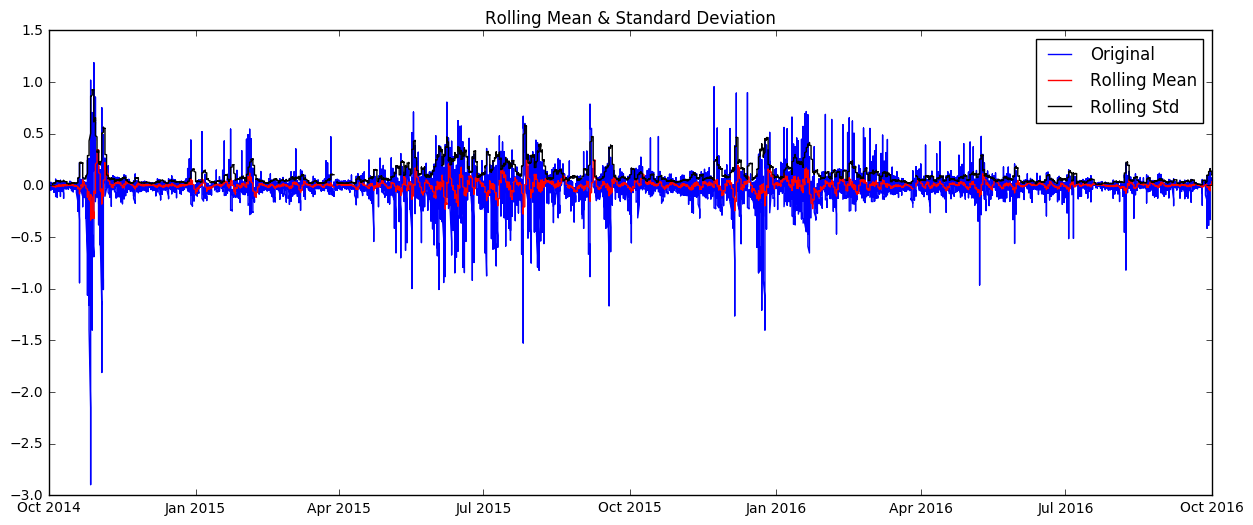

Results of Dickey-Fuller Test:


C:\local\Anaconda3-4.1.1-Windows-x86_64\envs\cntk-py34\lib\site-packages\numpy\linalg\linalg.py:1546: RuntimeWarning: invalid value encountered in greater
  return sum(S > tol)


LinAlgError: SVD did not converge

In [104]:
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)